In [8]:
from IPython.display import display
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
%matplotlib inline

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    
    stratify=cancer.target, 
    # stratify: cancer.target데이터의 비율을 살펴서 split해줌으로써 지나치게 특정 라벨의 데이터만 들어가는 것을 사전에 방지한다.
    
    random_state=66
)

### 2.3.6 결정 트리의 앙상블
##### Random forests
- 앙상블이란 여러 머신러닝 모델을 합쳐서 강력한 하나의 모델을 만드는 것을 말한다.
- 앙상블을 써야 하는 이유는 결정 트리에 있다. 결정 트리 하나는 지나치게 과적합 될 가능성을 늘 갖고 있다.
- 랜덤 포레스트는 앙상블 기법 중의 하나인데, 여러 결정 트리를 하나로 뭉치는 기법이다.
- 랜덤 포레스트를 구성하는 결정 트리 하나하나는 모두 랜덤하게 뽑힌 데이터에 과적합되어도 괜찮다.
- 결정 트리 각각은 랜덤하게 뽑힌 데이터들이 들어가므로 모두 다른 방식으로 과적합 상태가 된다.
- 결정 트리들이 내리는 결정의 평균값을 내어 과적합의 영향을 줄이고 모델의 예측 성능이 향상됨(수학적으로 증명됨)

###### Building random forests
- 몇 개의 결정 트리를 만들지 n_estimators 매개변수를 이용하여 결정
- bootstrap sample
    - 전체 데이터셋에서 데이터셋 전체 개수번 데이터를 랜덤하게 뽑는다.
    - 이렇게 하면 원래 데이터셋과 크기는 동일하지만 데이터의 구성이 달라지게 된다.
    - 즉 데이터에 무작위성을 부여하게 되는 효과가 있다.
    - [a, b, c, d] --> [b, d, d, c], [d, a, d, a], ...

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Data shape: (100, 2)
Target shape: (100,)


In [31]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

- RandomForestClassifier
  - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  - 각 트리에 대해 독립적인 bootstrap sample 생성
    - bootstrap samples
      - n_samples 개의 데이터 포인트 중에서 무작위로 n_samples 개의 데이터를 추출 (하나의 샘플이 중복되어 추출 가능)
  - n_estimators
    - 생성할 트리의 개수    
  - max_features
    - 각 트리 노드에서 후보 특성을 무작위로 선정
    - 그러한 선정 작업시에 몇 개의 특성까지 선정할지를 결정함
    - 후보 특성을 선정하는 작업은 매 노드마다 반복 --> 각 노드는 서로 다른 후보 특성을 사용하게 됨
    - max_features를 n_features로 설정하면 각 노드에서 모든 특성을 고려 --> 무작위성이 줄어들게 됨
    - max_features를 1로 설정하면 각 노드에서 선택된 특성의 임계값만으로 분기 --> 트리의 깊이가 깊어짐
    - 기본값: auto
      - RandomForestClassifier: sqrt(n_features)
      - RandomForestRegressor: n_features
  - n_jobs
    - 사용할 CPU 코어 수 지정
    - n_jobs = -1 로 지정하면 컴퓨터의 모든 코어 사용
  - random_state
    - 서로 다른 random_state에 대해 전혀 다른 트리들이 생성
  - max_depth
    - 사전 가지치기 옵션
  - min_samples_split: int, float, optional (default=2)
    - The minimum number of samples required to split an internal node:
    - If int, then consider min_samples_split as the minimum number.
    - If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [32]:
mat = np.ones((2,3))
print(mat.shape)
print(mat)

print()

mat2 = mat.ravel()
print(mat2.shape)
print(mat2)

(2, 3)
[[ 1.  1.  1.]
 [ 1.  1.  1.]]

(6,)
[ 1.  1.  1.  1.  1.  1.]


'\n    결정 경계를 더 부드럽게 만들기 위해서는 결정 트리의 개수를 늘리면 된다.\n    특성의 개수(max_features)를 많이 고려할수록, 대부분의 트리들에서 특성 중요도가 높은 특성으로만 결정 경계를 형성하려 할 것이다.\n    그러나 적은 개수의 특성을 고려한다면, 한정된 개수로 주어진 특성 만으로 자신의 데이터셋을 분류해야 하기 때문에 깊이가 깊어질 수 밖에 없게 되고 과적합이 이루어진다.\n'

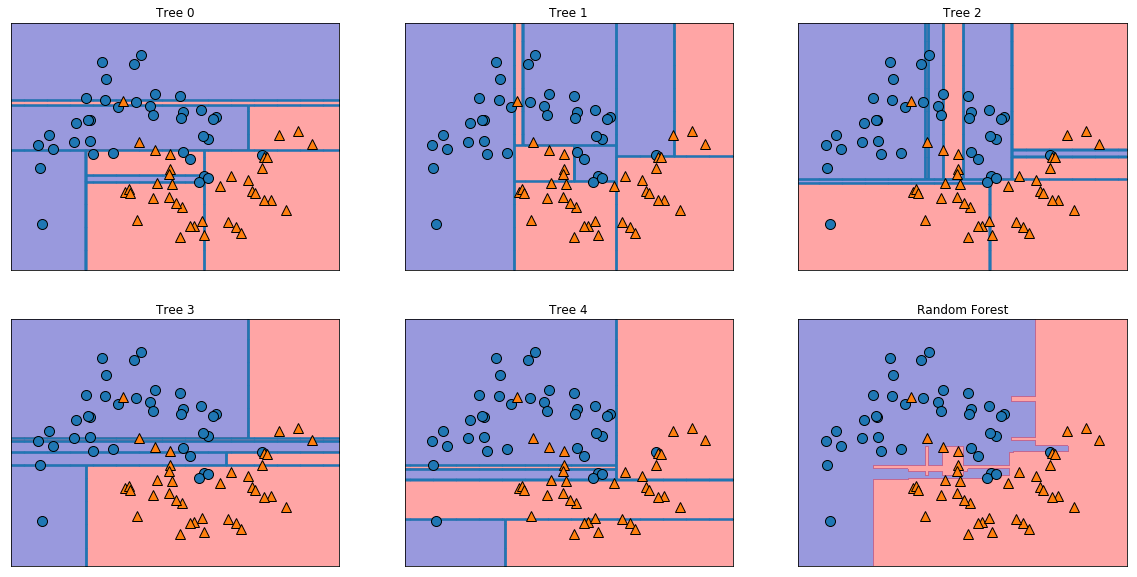

In [33]:
'''
    랜덤 포레스트 안에 만들어진 결정 트리들에 대한 정보는 forest.estimators_안에 있다.
'''
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
'''
    결정 경계를 더 부드럽게 만들기 위해서는 결정 트리의 개수를 늘리면 된다.
    특성의 개수(max_features)를 많이 고려할수록, 대부분의 트리들에서 특성 중요도가 높은 특성으로만 결정 경계를 형성하려 할 것이다.
    그러나 적은 개수의 특성을 고려한다면, 한정된 개수로 주어진 특성 만으로 자신의 데이터셋을 분류해야 하기 때문에 깊이가 깊어질 수 밖에 없게 되고 과적합이 이루어진다.
'''

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


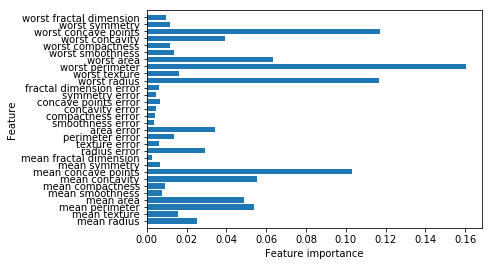

In [17]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.show()


plot_feature_importances_cancer(forest)

- 랜덤 포레스트를 만드는 무작위성
  - 알고리즘이 가능성 있는 많은 경우를 고려할 수 있게 해줌
  - 단일 트리 방식보다 더 넓은 시각으로 데이터를 바라볼 수 있게 해줌

###### Strengths, weaknesses, and parameters
- 랜던 포레스트는 회귀와 분류에 있어서 가장 널리 사용되는 머신러닝 알고리즘
- 대부분의 경우에 있어서 성능이 뛰어나고 매개변수 튜닝없이도 잘 작동
- 데이터 feature개수가 많지만 (차원이 높고) 희소한 데이터에서는 성능이 낮음
- 선형 모델보다 속도가 느리고 더 많은 메모리 사용
- 가용한 시간과 메모리가 허용하는 한 n_estimators는 클수록 좋음 --> 더 많은 트리 사용

## 그래디언트 부스팅 회귀 트리
- 앙상블로 소개되는 두 번째 방법
- 회귀와 분류 모두에 사용 가능
- 이전 트리의 오차를 보완하는 방식으로, 순차적으로 트리를 구성
  - 1~5 레벨 정도의 깊지 않은 트리 구성함으로써 메모리를 적게 사용하고 예측도 빨리 할 수 있음
  - 그래디언트 부스팅은 이전에 만든 트리의 예측과 타깃값 사이의 오차를 줄이는 방향으로 새로운 트리를 추가한다.
  - 이를 위해 loss function을 정의하여 gradient descent 알고리즘으로 값을 보정해나간다.
- 많은 개수의 Weak Learners (얕은 트리 같은 간단한 모델)를 연결하는 것이 기본 아이디어
  - 각각의 Weak Learner는 일부 데이터에 대해서만 예측이 잘 되도록 만들어져 있음
  - Weak Learner가 추가될수록 좋음
- 주요 파라미터: learning_rate, n_estimators
  - learning_rate가 크면 이전 트리의 보정을 강하게 하기 때문에 더 복잡한 모델을 구성하게 됨.
  - n_estimators 값을 키워서 앙상블 내에 트리의 개수를 증가시킬 수 있음

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


- GradientBoostingClassifier 파라미터 기본값
  - max_depth=3 (트리 깊이 3)
  - n_estimators = 100 (트리 100개)
  - learning_rate = 0.1

In [19]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [20]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


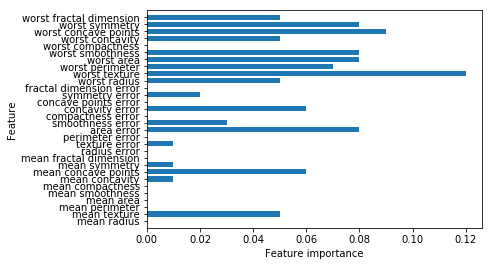

In [21]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

- GradientBoostingClassifier에서는 일부 특성이 종종 완전히 무시됨

##### Strengths, weaknesses and parameters
- GradientBoostingClassifier 방법
  - 지도학습에서 가장 강력하고 널리 사용되는 모델 중 하나
  - 단점
    - 매개변수 조정 필요
    - 훈련시간이 다소 길다.
    - 특성들에 대해 희소한 고차원 데이터에서 잘 작동하지 않음
<!-- more -->
<br/><br/>
- xgboost (https://xgboost.readthedocs.io) 사용 검토 필요
  - 대용량 분산 처리 지원
  - GPU 활용 플러그인 지원